### NLP - Notebook 2

### Cleaning, Preparing and Provisioning of NLP Data

In this notebook we will clean our dataset by creating a list of stop words and removing these.

We will then split our data in training and testing subsets.

We will then examine the distribution of the labels in these subsets.

In [58]:
# Import the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import pickle
import nltk

dataset = pd.read_csv ('Data/TIL_NLP_train_dataset.csv')
dataset.head()

,id,word_representation,outwear,top,trousers,women dresses,women skirts
0,0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0


In [59]:
dataset.shape

(7380, 7)

### Data Cleaning

In [60]:
# First we drop ID column
dataset.drop(columns='id', inplace=True)
dataset

,word_representation,outwear,top,trousers,women dresses,women skirts
0,w7718 w173355 w138132 w232277 w90685 w314686 w...,1,0,1,0,0
1,w195317 w127737 w171593 w22890 w342007 w217871...,1,0,1,0,0
2,w247655 w270233 w261113 w337250 w366000 w37873...,0,1,1,0,0
3,w279289 w395855 w61795 w286461 w308610 w27013 ...,1,0,1,0,0
4,w254516 w135431 w115724 w331534 w256214 w71240...,1,0,1,0,0
...,...,...,...,...,...,...
7375,w373517 w350483 w37419 w162965 w286461 w35248 ...,0,1,1,0,0
7376,w261297 w162756 w283853 w500021 w256905 w22079...,1,1,0,0,0
7377,w58536 w182664 w317736 w261297 w91800 w314686 ...,1,0,1,0,0
7378,w194870 w122953 w256905 w66217 w207614 w34893 ...,1,1,0,0,0


In [61]:
# Set the word_representation to X and the labels to y
headings = ['outwear', 'top', 'trousers', 'women dresses', 'women skirts']
X = pd.DataFrame(dataset['word_representation'].values, columns=['word_representation'])
y = pd.DataFrame(dataset.drop(columns=['word_representation']).values, columns=headings)

In [62]:
X

,word_representation
0,w7718 w173355 w138132 w232277 w90685 w314686 w...
1,w195317 w127737 w171593 w22890 w342007 w217871...
2,w247655 w270233 w261113 w337250 w366000 w37873...
3,w279289 w395855 w61795 w286461 w308610 w27013 ...
4,w254516 w135431 w115724 w331534 w256214 w71240...
...,...
7375,w373517 w350483 w37419 w162965 w286461 w35248 ...
7376,w261297 w162756 w283853 w500021 w256905 w22079...
7377,w58536 w182664 w317736 w261297 w91800 w314686 ...
7378,w194870 w122953 w256905 w66217 w207614 w34893 ...


In [63]:
y

,outwear,top,trousers,women dresses,women skirts
0,1,0,1,0,0
1,1,0,1,0,0
2,0,1,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
7375,0,1,1,0,0
7376,1,1,0,0,0
7377,1,0,1,0,0
7378,1,1,0,0,0


In [64]:
X.shape

(7380, 1)

In [65]:
y.shape

(7380, 5)

In [66]:
# Rename the class labels for clarity
y.rename(columns={'outwear': 'outerwear', 'top': 'tops', 'trousers': 'pants', 'women dresses': 'dresses', 
                  'women skirts': 'skirts'}, inplace=True)

In [67]:
y

,outerwear,tops,pants,dresses,skirts
0,1,0,1,0,0
1,1,0,1,0,0
2,0,1,1,0,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
7375,0,1,1,0,0
7376,1,1,0,0,0
7377,1,0,1,0,0
7378,1,1,0,0,0


In [68]:
headings = list(y.columns)

In [69]:
headings

['outerwear', 'tops', 'pants', 'dresses', 'skirts']

To get a sense of the types of sentences we are dealing with we will write a function that converts the masked words into English.  From these we will be able to see the words that are producing the labels.

In [70]:
# Import GloVe vectors and store in a dictionary 
glove_embeddings = collections.OrderedDict()
with open('Data\glove.6B.100d.txt', encoding='utf8') as file:
    for line in file:
        items = line.replace('\n', '').split(' ')
        glove_embeddings[items[0]] = items[1:]

In [71]:
# Import word_embeddings file
with open ('Data\word_embeddings.pkl', 'rb') as file:
    embeddings = pickle.load(file)

In [72]:
"""
This function will take a row number of our dataset as input.
It will split the masked words and find the embeddings for each.  
It will then match the embeddings to the GloVe values - except if we do not have an embedding.
It will return the converted English sentence.
"""
def unpacked_masked_words(index):
    
    words = []
    for element in X['word_representation'][index].split(' '):    
        words.append(element)
    
    new_text = ""
    for masked_word in words:
        try:
            masked = list([str(x) for x in embeddings[masked_word]])

            for word, values in glove_embeddings.items():
                if masked == values:
                    new_text += word +' '
        except:
            if masked_word:
                print("Missing: ", masked_word)
    
    print(new_text)

In [73]:
print(X['word_representation'][5555])
print(y.iloc[5555])

w194870 w220342 w308610 w261297 w250980 w392167 w311583 w162756 w120502 w295346 w263923 w314686 w500510 w186076 w194870 w44158 w336842 w384021 w173688 w222895 w376233 w250138
outerwear    1
tops         0
pants        1
dresses      1
skirts       0
Name: 5555, dtype: int64


In [74]:
# Use this function on a random row
unpacked_masked_words(5555)

Missing:  w500510
the siblings matching basic collarless blazer with zip pockets tapered cargo pants to the birthday halter neck high slits midi dress 


We see three labels appearing in this sentence.
- blazer - "outerwear"
- cargo pants - "pants"
- midi dress - "dresses"

### Removing Stop Words

We will import a list of English stop words, examining for any that we would like to keep in our dataset.  We will then use the GloVe model to convert these into vectors, and then match those vectors with our word embeddings.  This will provide us with the masked words that we can then remove from our dataset.

In [75]:
# Import list of default Stop Words using nltk
from nltk.corpus import stopwords
default_stopwords = set(stopwords.words('english'))

In [76]:
print (default_stopwords)

{'her', 'such', 'against', 'this', 'itself', 'our', 'here', "couldn't", "didn't", 'off', 'isn', 've', 'don', 'on', 'at', "haven't", 'he', 'haven', 'any', 'wouldn', 'yourself', 'ain', "shouldn't", 'my', 'with', 'of', 'shan', 'be', 'between', 'when', "don't", 'an', "mustn't", 'who', 'are', 'did', 'yourselves', 'more', 'once', 'some', 'ma', 'your', "needn't", 'its', 'd', 'hasn', "mightn't", 'after', 'has', 'in', 'through', 'so', 'other', 'which', 'being', "it's", 'ourselves', "weren't", "hasn't", 'is', 'and', 'aren', 'am', 'by', 'whom', 'himself', "doesn't", "that'll", 'me', 'myself', 'been', "should've", 'very', 'or', 'hadn', 'no', 'because', 'while', 'too', 'most', 'couldn', "you'll", 'those', 'his', 'having', 'she', 'about', 'there', 's', 'does', 'o', 'wasn', 'not', 'under', 're', 'y', "won't", 'yours', 'out', 'do', 'how', 'as', 'from', 'they', 'just', 'now', 'ours', 'doesn', 'doing', "wouldn't", 'i', 'up', 'own', 'these', 'where', 't', 'few', 'same', 'herself', 'will', 'theirs', 'for'

Looking through this list we see some words that we would like to keep; these are the words related to gender, as well as "over" and "under" which could be used to describe clothing.  We will create a list of these words and remove them from our stop words list.

In [77]:
dont_remove = set(['hers', 'himself', 'his', 'herself', 'him', 'over', 'under', 'she\'s', 'her', 'she', 'his', 'he'])
custom_stopwords = default_stopwords - dont_remove

For the words in custom_stopwords, we must now find their maskings by the process outlined above.

In [78]:
"""
This function will take an English word, get it's GloVe representation and then match that 
to the vector in the world embeddings file.  It will return the masked word associated 
with that English world.  It will also generate a list of words we do not have GloVe vectors for.
"""
def get_masking(inputword):
    try:
        vector = np.asarray(glove_embeddings[inputword], dtype='float32')
        for key, value in embeddings.items():
            if (value==vector).all():
                return key
    except:
        print("Missing GloVe Vector for: ", inputword)

In [79]:
# For each word in our custom stop words list, use the above function to find its masked word
masked_stop_words = []
for word in custom_stopwords:
    masked_stop_words.append(get_masking(word))

Missing GloVe Vector for:  couldn't
Missing GloVe Vector for:  didn't
Missing GloVe Vector for:  haven't
Missing GloVe Vector for:  shouldn't
Missing GloVe Vector for:  don't
Missing GloVe Vector for:  mustn't
Missing GloVe Vector for:  needn't
Missing GloVe Vector for:  mightn't
Missing GloVe Vector for:  it's
Missing GloVe Vector for:  weren't
Missing GloVe Vector for:  hasn't
Missing GloVe Vector for:  doesn't
Missing GloVe Vector for:  that'll
Missing GloVe Vector for:  should've
Missing GloVe Vector for:  hadn
Missing GloVe Vector for:  you'll
Missing GloVe Vector for:  won't
Missing GloVe Vector for:  wouldn't
Missing GloVe Vector for:  isn't
Missing GloVe Vector for:  needn
Missing GloVe Vector for:  mightn
Missing GloVe Vector for:  mustn
Missing GloVe Vector for:  you'd
Missing GloVe Vector for:  hadn't
Missing GloVe Vector for:  wasn't
Missing GloVe Vector for:  shan't
Missing GloVe Vector for:  you've
Missing GloVe Vector for:  you're
Missing GloVe Vector for:  aren't


In [80]:
print(masked_stop_words)

['w374012', 'w59496', 'w254516', 'w52829', 'w383451', 'w358112', None, None, 'w279437', 'w119862', 'w42997', 'w21643', 'w225739', 'w186457', None, 'w226905', 'w393975', 'w8207', 'w206715', 'w219051', None, 'w43546', 'w311583', 'w374393', 'w241945', 'w240587', 'w50014', 'w247655', None, 'w189406', None, 'w195815', 'w256905', 'w61977', 'w314675', 'w82341', 'w339006', 'w372126', 'w324376', 'w84933', None, 'w337250', 'w225970', 'w354794', None, 'w29880', 'w182664', 'w66980', 'w283853', 'w287754', 'w282136', 'w391554', 'w206917', None, 'w37296', None, None, 'w254429', 'w217871', 'w50388', 'w310450', 'w174897', 'w392605', None, None, 'w285847', 'w40706', 'w335583', None, 'w77677', 'w48576', None, 'w384857', 'w374278', 'w230409', 'w317736', 'w293558', 'w302243', None, 'w143943', 'w126120', 'w18470', 'w84287', 'w165609', 'w319085', 'w257725', 'w121657', 'w264542', 'w328097', 'w264611', None, 'w129082', 'w381413', 'w141243', 'w214976', 'w93366', 'w105773', 'w279289', 'w309353', 'w381195', 'w369

In [81]:
# Export the list of custom masked stop words
import json
filename = 'custom_masked_stopwords.json'
with open(filename, 'w') as f:
    json.dump(masked_stop_words, f)

In [82]:
print(list(filter(None, masked_stop_words)))

['w374012', 'w59496', 'w254516', 'w52829', 'w383451', 'w358112', 'w279437', 'w119862', 'w42997', 'w21643', 'w225739', 'w186457', 'w226905', 'w393975', 'w8207', 'w206715', 'w219051', 'w43546', 'w311583', 'w374393', 'w241945', 'w240587', 'w50014', 'w247655', 'w189406', 'w195815', 'w256905', 'w61977', 'w314675', 'w82341', 'w339006', 'w372126', 'w324376', 'w84933', 'w337250', 'w225970', 'w354794', 'w29880', 'w182664', 'w66980', 'w283853', 'w287754', 'w282136', 'w391554', 'w206917', 'w37296', 'w254429', 'w217871', 'w50388', 'w310450', 'w174897', 'w392605', 'w285847', 'w40706', 'w335583', 'w77677', 'w48576', 'w384857', 'w374278', 'w230409', 'w317736', 'w293558', 'w302243', 'w143943', 'w126120', 'w18470', 'w84287', 'w165609', 'w319085', 'w257725', 'w121657', 'w264542', 'w328097', 'w264611', 'w129082', 'w381413', 'w141243', 'w214976', 'w93366', 'w105773', 'w279289', 'w309353', 'w381195', 'w369879', 'w233354', 'w215751', 'w374768', 'w90685', 'w314861', 'w39304', 'w173100', 'w1867', 'w81629', 'w

We now have the maskings for our stop words.  The next step is to find all occurrences of these in our X dataset and remove them.

In [83]:
# Create a new column, tokenized_words
# Each row will be a list of the words in the row - we will use this to count our words
X['tokenized_words'] = X.apply(lambda row: nltk.word_tokenize(row[0]), axis=1)

In [84]:
# Add a column showing the word count for each row - for future reference
X['Word Count'] = [len(c) for c in X['tokenized_words']]
X

,word_representation,tokenized_words,Word Count
0,w7718 w173355 w138132 w232277 w90685 w314686 w...,"[w7718, w173355, w138132, w232277, w90685, w31...",21
1,w195317 w127737 w171593 w22890 w342007 w217871...,"[w195317, w127737, w171593, w22890, w342007, w...",15
2,w247655 w270233 w261113 w337250 w366000 w37873...,"[w247655, w270233, w261113, w337250, w366000, ...",21
3,w279289 w395855 w61795 w286461 w308610 w27013 ...,"[w279289, w395855, w61795, w286461, w308610, w...",16
4,w254516 w135431 w115724 w331534 w256214 w71240...,"[w254516, w135431, w115724, w331534, w256214, ...",15
...,...,...,...
7375,w373517 w350483 w37419 w162965 w286461 w35248 ...,"[w373517, w350483, w37419, w162965, w286461, w...",13
7376,w261297 w162756 w283853 w500021 w256905 w22079...,"[w261297, w162756, w283853, w500021, w256905, ...",18
7377,w58536 w182664 w317736 w261297 w91800 w314686 ...,"[w58536, w182664, w317736, w261297, w91800, w3...",21
7378,w194870 w122953 w256905 w66217 w207614 w34893 ...,"[w194870, w122953, w256905, w66217, w207614, w...",28


In [85]:
# Display the total number of words in our dataset
X['Word Count'].sum()

145687

In [86]:
# Create a dictionary - its key will be a row index
# For each row, keep only the words that do not appear in the masked stop words list
# Store these in the dictionary values
indicies = list(X.index.values)
dicta = {}
for row in indicies:
    no_stop_words = ''
    for element in X['word_representation'][row].split(' '):
        if element not in masked_stop_words:
            no_stop_words += str(element) + ' '
    dicta[row]= no_stop_words

In [87]:
# Create a new column containing the words that are left over after removing the stop words
X['no_stop_words'] = X.index.map(dicta)

In [88]:
X

,word_representation,tokenized_words,Word Count,no_stop_words
0,w7718 w173355 w138132 w232277 w90685 w314686 w...,"[w7718, w173355, w138132, w232277, w90685, w31...",21,w7718 w173355 w138132 w232277 w314686 w292000 ...
1,w195317 w127737 w171593 w22890 w342007 w217871...,"[w195317, w127737, w171593, w22890, w342007, w...",15,w195317 w127737 w171593 w22890 w342007 w289824...
2,w247655 w270233 w261113 w337250 w366000 w37873...,"[w247655, w270233, w261113, w337250, w366000, ...",21,w261113 w366000 w378735 w500012 w306830 w20025...
3,w279289 w395855 w61795 w286461 w308610 w27013 ...,"[w279289, w395855, w61795, w286461, w308610, w...",16,w286461 w308610 w27013 w272605 w287214 w15393 ...
4,w254516 w135431 w115724 w331534 w256214 w71240...,"[w254516, w135431, w115724, w331534, w256214, ...",15,w135431 w115724 w331534 w256214 w71240 w326106...
...,...,...,...,...
7375,w373517 w350483 w37419 w162965 w286461 w35248 ...,"[w373517, w350483, w37419, w162965, w286461, w...",13,w373517 w350483 w37419 w162965 w286461 w35248 ...
7376,w261297 w162756 w283853 w500021 w256905 w22079...,"[w261297, w162756, w283853, w500021, w256905, ...",18,w261297 w162756 w500021 w220790 w233042 w20894...
7377,w58536 w182664 w317736 w261297 w91800 w314686 ...,"[w58536, w182664, w317736, w261297, w91800, w3...",21,w58536 w261297 w91800 w314686 w373517 w500070 ...
7378,w194870 w122953 w256905 w66217 w207614 w34893 ...,"[w194870, w122953, w256905, w66217, w207614, w...",28,w122953 w66217 w56481 w37419 w218713 w286461 w...


In [89]:
# As before, create two new columns to count the number of words in our new column
X['new_tokenized_words'] = X.apply(lambda row: nltk.word_tokenize(row[3]), axis=1)
X['New Word Count'] = [len(c) for c in X['new_tokenized_words']]

In [90]:
X

,word_representation,tokenized_words,Word Count,no_stop_words,new_tokenized_words,New Word Count
0,w7718 w173355 w138132 w232277 w90685 w314686 w...,"[w7718, w173355, w138132, w232277, w90685, w31...",21,w7718 w173355 w138132 w232277 w314686 w292000 ...,"[w7718, w173355, w138132, w232277, w314686, w2...",16
1,w195317 w127737 w171593 w22890 w342007 w217871...,"[w195317, w127737, w171593, w22890, w342007, w...",15,w195317 w127737 w171593 w22890 w342007 w289824...,"[w195317, w127737, w171593, w22890, w342007, w...",13
2,w247655 w270233 w261113 w337250 w366000 w37873...,"[w247655, w270233, w261113, w337250, w366000, ...",21,w261113 w366000 w378735 w500012 w306830 w20025...,"[w261113, w366000, w378735, w500012, w306830, ...",17
3,w279289 w395855 w61795 w286461 w308610 w27013 ...,"[w279289, w395855, w61795, w286461, w308610, w...",16,w286461 w308610 w27013 w272605 w287214 w15393 ...,"[w286461, w308610, w27013, w272605, w287214, w...",12
4,w254516 w135431 w115724 w331534 w256214 w71240...,"[w254516, w135431, w115724, w331534, w256214, ...",15,w135431 w115724 w331534 w256214 w71240 w326106...,"[w135431, w115724, w331534, w256214, w71240, w...",11
...,...,...,...,...,...,...
7375,w373517 w350483 w37419 w162965 w286461 w35248 ...,"[w373517, w350483, w37419, w162965, w286461, w...",13,w373517 w350483 w37419 w162965 w286461 w35248 ...,"[w373517, w350483, w37419, w162965, w286461, w...",12
7376,w261297 w162756 w283853 w500021 w256905 w22079...,"[w261297, w162756, w283853, w500021, w256905, ...",18,w261297 w162756 w500021 w220790 w233042 w20894...,"[w261297, w162756, w500021, w220790, w233042, ...",14
7377,w58536 w182664 w317736 w261297 w91800 w314686 ...,"[w58536, w182664, w317736, w261297, w91800, w3...",21,w58536 w261297 w91800 w314686 w373517 w500070 ...,"[w58536, w261297, w91800, w314686, w373517, w5...",13
7378,w194870 w122953 w256905 w66217 w207614 w34893 ...,"[w194870, w122953, w256905, w66217, w207614, w...",28,w122953 w66217 w56481 w37419 w218713 w286461 w...,"[w122953, w66217, w56481, w37419, w218713, w28...",19


In [91]:
# Count the total number of words with stop words removed
X['New Word Count'].sum()

111719

We see that we've gone from 145687 to 110463 total words in our dataset by removing the stop words.

In [92]:
# Create a new Data Frame containing only the columns we want
X_no_stop_words = X.drop(columns=['word_representation', 'tokenized_words', 'Word Count', 
                                        'new_tokenized_words', 'New Word Count'])

In [93]:
# Our cleaned dataset
X_no_stop_words

,no_stop_words
0,w7718 w173355 w138132 w232277 w314686 w292000 ...
1,w195317 w127737 w171593 w22890 w342007 w289824...
2,w261113 w366000 w378735 w500012 w306830 w20025...
3,w286461 w308610 w27013 w272605 w287214 w15393 ...
4,w135431 w115724 w331534 w256214 w71240 w326106...
...,...
7375,w373517 w350483 w37419 w162965 w286461 w35248 ...
7376,w261297 w162756 w500021 w220790 w233042 w20894...
7377,w58536 w261297 w91800 w314686 w373517 w500070 ...
7378,w122953 w66217 w56481 w37419 w218713 w286461 w...


### Finding the Most Common Words Before and After Removing Stop Words

To do this we make use of the Count Vectorizer.  This will create a matrix where the columns represent each unique word in the dataset.  The matrix will show the counts of each word within each row, and we can sum by column to find the total count for each word.

In [94]:
from sklearn.feature_extraction.text import CountVectorizer
"""
This function will take a corups of documents, a length, and an n as parameters.
It will use the Count Vectorizer to create a list of words (word combinations if a 
length is provided) and count the number of times each appears in the corpus.  It will 
then sort by count and return the top n, requested.
"""
def n_most_common (corpus, length=1, n=None):
   # Create a Count Vectorizer object and fit and transform the corpus
    vec = CountVectorizer(ngram_range=(length, length)).fit(corpus)
    words = vec.transform(corpus)
    
    # This creates a matrix with a row for each row of the dataset 
    # The columns represent each unique word in the corpus, with values for the 
    # count within that row. 
    # Summing along each column will produce the count for each unique word
    # Sum the occurrence of each uniqe word
    sum_words = words.sum(axis=0) 
        
    # vec.vocabulary_ is a dictionary of words and their indexes 
    # create tuples for each word and the sum according to its index in sum_words
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # Sort in descending order by value, the count
    words_freq =sorted(words_freq, key = lambda item: item[1], reverse=True)
    print(len(vec.vocabulary_))
    # Return the words and counts of the n highest
    return words_freq[:n]

In [95]:
# The original data with stop words present
dataset['word_representation']

0       w7718 w173355 w138132 w232277 w90685 w314686 w...
1       w195317 w127737 w171593 w22890 w342007 w217871...
2       w247655 w270233 w261113 w337250 w366000 w37873...
3       w279289 w395855 w61795 w286461 w308610 w27013 ...
4       w254516 w135431 w115724 w331534 w256214 w71240...
                              ...                        
7375    w373517 w350483 w37419 w162965 w286461 w35248 ...
7376    w261297 w162756 w283853 w500021 w256905 w22079...
7377    w58536 w182664 w317736 w261297 w91800 w314686 ...
7378    w194870 w122953 w256905 w66217 w207614 w34893 ...
7379    w194870 w122953 w66217 w207614 w34893 w56481 w...
Name: word_representation, Length: 7380, dtype: object

In [96]:
# Using the function above to get the top 50 words
top50_stop = n_most_common(dataset['word_representation'], n=50)

4249


Including stop words there are a total of 4,249 unique words within the dataset.

In [97]:
# top50_stop is a list of tuples - we will unzip and extract the first element of each
x_stop = list(list(zip(*top50_stop))[0])
print(x_stop)

['w34893', 'w194870', 'w217871', 'w311583', 'w186076', 'w241910', 'w120979', 'w250138', 'w66980', 'w286461', 'w221983', 'w111248', 'w195317', 'w374393', 'w193800', 'w207614', 'w314686', 'w15393', 'w33992', 'w36882', 'w197783', 'w270233', 'w384021', 'w373517', 'w1867', 'w225739', 'w256553', 'w121255', 'w342007', 'w204762', 'w12685', 'w237465', 'w286596', 'w276473', 'w115724', 'w380494', 'w20297', 'w254429', 'w105773', 'w173688', 'w376233', 'w254516', 'w151648', 'w318673', 'w234583', 'w93366', 'w85858', 'w240587', 'w277040', 'w155034']


In [98]:
"""
This function will take a masked word, get its embedding and then convert to a list of strings to
match the format of the GloVe vectors.  It will then search the dictionary to find the GloVe key (English word)
that matches this vector.
"""

def mask_to_english(inputword):
    masked = embeddings[inputword]
    word_list = []
    for item in masked:
        word_list.append(str(item))
    
    for key, value in glove_embeddings.items():
        if value == word_list:
            return key

In [99]:
# Use the function to translate these maskings back into English
top50_english = []
for i in x_stop:
    engword = mask_to_english(i)
    top50_english.append(engword)
print(top50_english)

['a', 'the', 'and', 'with', 'to', 'shorts', 'shirt', 'dress', 'in', 'wearing', 'skirt', 'black', 'he', 'of', 'sleeve', 'for', 'pants', 'jacket', 'top', 'tee', 'short', 'you', 'neck', 'his', 't', 'on', 'was', 'long', 'hoodie', 'adidas', 'jeans', 'she', 'slim', 'fit', 'logo', 'denim', 'look', 'is', 'from', 'high', 'midi', 'this', 'wear', 'her', 'tie', 'as', 'waist', 'be', 'button', 'it']


In [100]:
# Join the words into a string
top50_str_stop = (" ").join(top50_english)

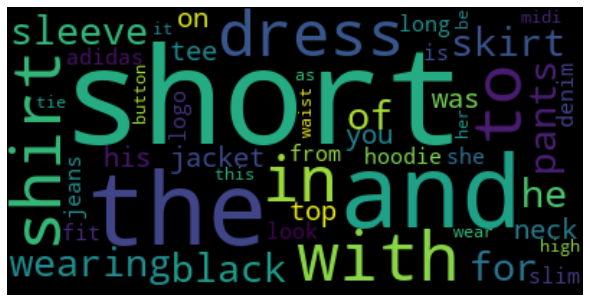

In [101]:
# Plot the top 50 words as a Word Cloud
from wordcloud import WordCloud
cloud = WordCloud(stopwords=[], background_color='black').generate(top50_str_stop)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#### After Removal of Stopwords

In [102]:
# Get the 50 most common words
top50 = n_most_common(X_no_stop_words['no_stop_words'], n=50)

4160


We see that the list of unique words has been reduced to 4,160. 

In [103]:
# top50 is a list of tuples - we will unzip and extract the first element of each
x = list(list(zip(*top50))[0])
print(x)

['w241910', 'w120979', 'w250138', 'w286461', 'w221983', 'w111248', 'w195317', 'w193800', 'w314686', 'w15393', 'w33992', 'w36882', 'w197783', 'w384021', 'w373517', 'w121255', 'w342007', 'w204762', 'w12685', 'w237465', 'w286596', 'w276473', 'w115724', 'w380494', 'w20297', 'w173688', 'w376233', 'w151648', 'w318673', 'w234583', 'w85858', 'w277040', 'w89538', 'w253354', 'w218713', 'w39218', 'w71240', 'w368487', 'w256214', 'w382355', 'w261297', 'w7718', 'w280823', 'w338587', 'w223408', 'w70969', 'w127737', 'w22890', 'w47586', 'w75397']


In [104]:
# For each of the top 50 masked words above, use the function mask_to_english to obtain the English words
top50_english = []
for i in x:
    engword = mask_to_english(i)
    top50_english.append(engword)
print(top50_english)

['shorts', 'shirt', 'dress', 'wearing', 'skirt', 'black', 'he', 'sleeve', 'pants', 'jacket', 'top', 'tee', 'short', 'neck', 'his', 'long', 'hoodie', 'adidas', 'jeans', 'she', 'slim', 'fit', 'logo', 'denim', 'look', 'high', 'midi', 'wear', 'her', 'tie', 'waist', 'button', 'white', 'together', 'seen', 'red', 'sweatshirt', 'skinny', 'crew', 'pair', 'basic', 'ua', 'mini', 'classic', 'blue', 'trousers', 'wore', 'print', 'sleeves', 'sweater']


In [105]:
top50_str = (" ").join(top50_english)

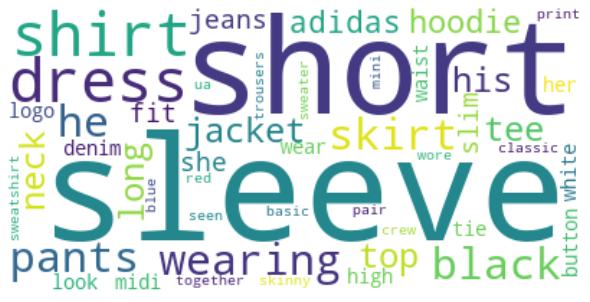

In [106]:
cloud = WordCloud(stopwords=[], background_color='white').generate(top50_str)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [107]:
# Save the cleaned data for future use
X_no_stop_words.to_csv('X_no_stop_words.csv', index=False, header=True)

### Data Preparing and Provisioning

In [108]:
# Split into 70% training data and 30% testing data
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X_no_stop_words, y, test_size=0.3, random_state=0)

In [109]:
print('Shape of X_train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X_train:  (5166, 1)
Shape of X_test:  (2214, 1)
Shape of y_train:  (5166, 5)
Shape of y_test:  (2214, 5)


In [110]:
# We will save these datasets for use in future notebooks

X_train.to_csv('X_train_nlp.csv', index=False, header=True)
X_test.to_csv('X_test_nlp.csv', index=False, header=True)
y_train.to_csv('y_train_nlp.csv', index=False, header=True)
y_test.to_csv('y_test_nlp.csv', index=False, header=True)

### Examining Label Distribution Among y Datasets

In [111]:
y_train

,outerwear,tops,pants,dresses,skirts
3319,0,1,0,1,0
4865,1,0,0,1,0
743,1,0,0,0,1
6233,0,0,0,1,1
5877,0,1,1,0,0
...,...,...,...,...,...
4931,0,0,0,1,0
3264,0,0,1,1,1
1653,1,0,1,0,0
2607,1,1,0,0,0


In [112]:
# Count the number of each label in the dataset
count_dict = {}
for column in headings:
    count_dict[column] = y_train[column].sum()
print(count_dict)
print('Total Labels:', sum(count_dict.values()))

{'outerwear': 2278, 'tops': 2297, 'pants': 2858, 'dresses': 900, 'skirts': 869}
Total Labels: 9202


C:\Users\mdjm0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


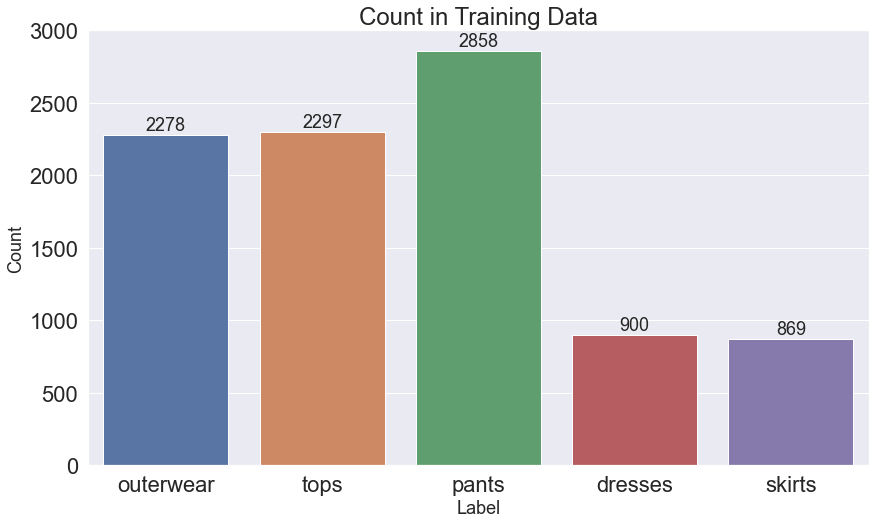

In [113]:
# Plot the labels in the training data
categories = headings
counts = [2278, 2297, 2858, 900, 869]
sns.set(font_scale = 2)
plt.figure(figsize=(14,8))

ax = sns.barplot(categories, counts)
plt.xlabel('Label', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Count in Training Data', fontsize=24)

rects = ax.patches
labels = counts
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height +5, label, ha='center', va='bottom', fontsize=18)
plt.show()

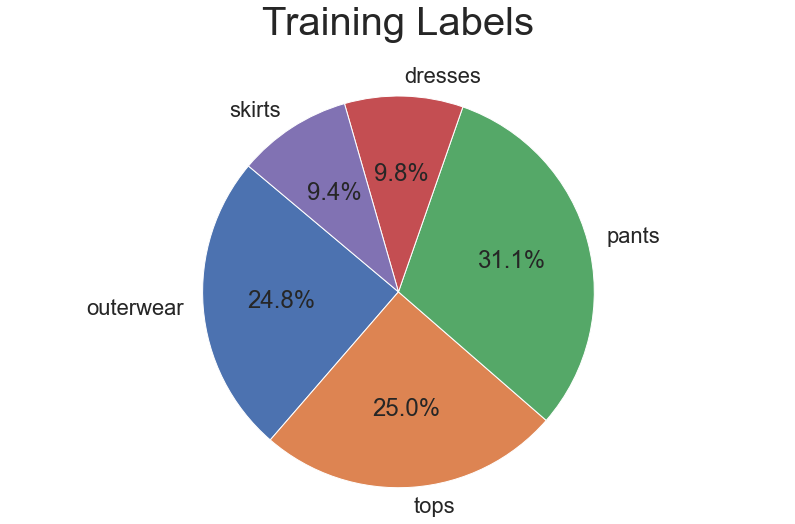

In [114]:
# Display the percentage of each label in a pie chart
labels = headings
sizes = [2278/9202, 2297/9202, 2858/9202, 900/9202, 869/9202]

plt.figure(figsize=(14,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.title("Training Labels", fontsize=40, y=1.08);

plt.axis('equal')
plt.show()

In [115]:
y_test

,outerwear,tops,pants,dresses,skirts
6305,0,1,1,0,0
4534,0,0,1,0,0
1995,1,0,0,0,1
4156,1,0,1,0,1
6326,1,0,0,0,1
...,...,...,...,...,...
1528,1,0,1,0,0
352,1,1,0,0,0
7241,0,1,0,1,0
3239,1,0,0,0,1


In [116]:
# Count the number of each label in the dataset
count_dict = {}
for column in headings:
    count_dict[column] = y_test[column].sum()
print(count_dict)
print('Total Labels:', sum(count_dict.values()))

{'outerwear': 1015, 'tops': 984, 'pants': 1251, 'dresses': 365, 'skirts': 367}
Total Labels: 3982


C:\Users\mdjm0\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


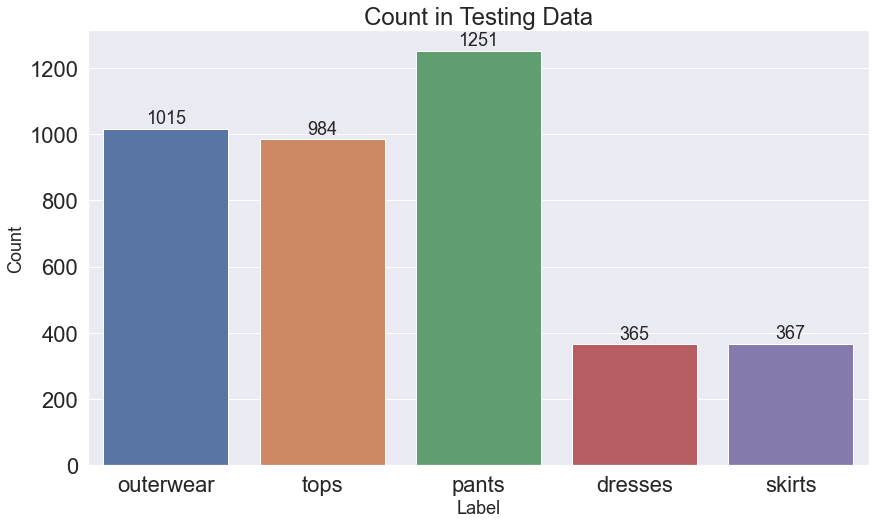

In [117]:
categories = headings
counts = [1015, 984, 1251, 365, 367]
sns.set(font_scale = 2)
plt.figure(figsize=(14,8))

ax = sns.barplot(categories, counts)
plt.xlabel('Label', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Count in Testing Data', fontsize=24)

rects = ax.patches
labels = counts
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height +5, label, ha='center', va='bottom', fontsize=18)
plt.show()

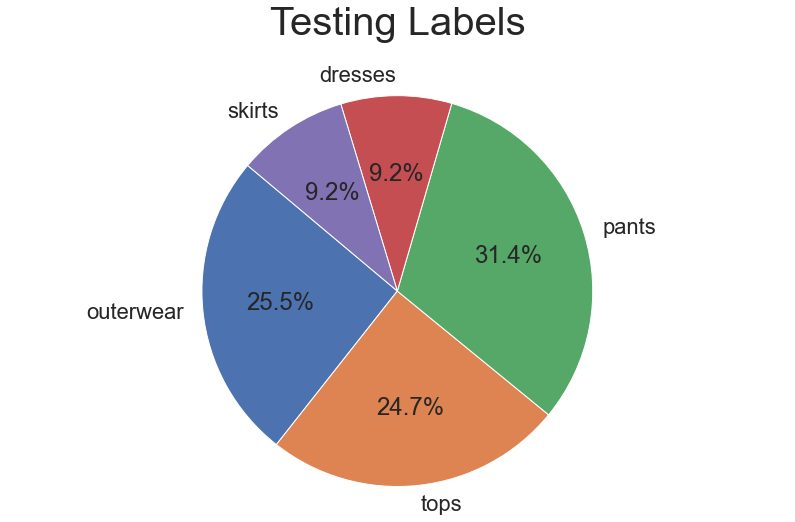

In [118]:
labels = headings
sizes = [1015/3982, 984/3982, 1251/3982, 365/3982, 367/3982]

plt.figure(figsize=(14,8))
plt.pie(sizes, labels=labels,
autopct='%1.1f%%', shadow=False, startangle=140)
plt.title("Testing Labels", fontsize=40, y=1.08);

plt.axis('equal')
plt.show()

- We see that between the training and testing datasets the distribution of labels is very similar.
- Tops: 25% and 24.7%
- Pants: 31.1% and 31.4%
- Outerwear: 24.8% and 25.5%
- Dresses: 9.8% and 9.2%
- Skirts: 9.4% and 9.2%

<b> Next Steps:</b>
    
In the next notebook will first select an evaluation metric and then begin testing learning algorithms.  